In [1]:
# load blocks of sentinel
# load coal plants
# for row in coal plants
# check whether in one of the blocks
# check what the predictions are (ROC curve?)
# load second pred
# check what the second stage bing preds are 

In [36]:
import pandas as pd
import geopandas as gpd
import glob
import numpy as np
from shapely.geometry import Point

In [21]:
output_layers = '/gws/nopw/j04/aopp/manshausen/deploy/deploy_outl/'

In [6]:
finished_list = glob.glob(output_layers+'*/*_BEN.gpkg') + glob.glob(output_layers+'*_BEN.gpkg')

In [8]:
df = gpd.GeoDataFrame()
for file in finished_list: 
    if file.split('/')[-1][0:2]=='44':
        tilename=file.split('/')[-1][:14]
        new = gpd.read_file(file)
        new['tile'] = tilename
        df = pd.concat([new, df ])
df = df.to_crs('WGS 84')

/home/users/pete_nut/miniconda3/envs/sentinelind/lib/python3.8/site-packages/geopandas/geodataframe.py:643: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/users/pete_nut/miniconda3/envs/sentinelind/lib/python3.8/site-packages/geopandas/geodataframe.py:643: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/users/pete_nut/miniconda3/envs/sentinelind/lib/python3.8/site-packages/geopandas/geodataframe.py:643: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/users/pete_nut/miniconda3/envs/sentinelind/lib/python3.8/site-packages/geopandas/geodataframe.py:643: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively

In [9]:
xl=pd.read_excel('/home/users/pete_nut/sentinel_industry/Global-Coal-Plant-Tracker-Jan-2022.xlsx', sheet_name=1)
xl=xl.loc[xl.Status=='operating'].loc[xl.Accuracy=='exact']
xl = xl.drop_duplicates(subset=["Latitude", "Longitude"], keep='first')

In [17]:
xl.Latitude

16      -22.519500
20      -22.522329
81      -18.201960
99      -20.507973
100     -20.473587
           ...    
13388    29.759339
13394    27.995710
13400    28.170407
13406    29.989186
13408    29.977879
Name: Latitude, Length: 2418, dtype: float64

In [27]:
dis = df.dissolve()

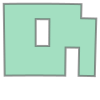

In [34]:
dis.iloc[0].geometry

In [29]:
i_xl = xl.loc[xl.Country == 'India']

In [42]:
i_xl.apply(lambda row: dis.iloc[0].geometry.contains(Point(row.Longitude, row.Latitude)), axis=1).sum()

51

In [44]:
pos = i_xl.loc[i_xl.apply(lambda row: dis.iloc[0].geometry.contains(Point(row.Longitude, row.Latitude)), axis=1)]

In [ ]:
# what are the probabilities returned for the 51 positives? 
# at a given threshold how many of the 51 are in? how many positives are there (positives - true pos)

In [47]:
pos.iloc[0].

Tracker ID                                                                    G100034
TrackerLOC                                                                    L102121
ParentID                                                                      P100097
Wiki page                              https://gem.wiki/Avantha_Bhandar_power_station
Country                                                                         India
Subnational unit (province, state)                                       Chhattisgarh
Unit                                            Adani Korba West power station Unit 1
Plant                                                  Adani Korba West power station
Chinese Name                                                                      NaN
Other names                                                                       NaN
Sponsor                                                      Korba West Power Company
Parent                                                

In [86]:
# going through the real positives, find how many of the sentinel blocks contain any of them... this should be a number greater than 51 as some will be contained in multiple blocks.

s = np.array([False]*len(df))
for i in range(len(pos)):
    print(i)
    ser = df.apply(lambda row: row.geometry.contains(Point(pos.iloc[i].Longitude, pos.iloc[i].Latitude)), axis =1)
    s = (ser.values | s)
    print(s.sum())

0
4
1
6
2
7
3
7
4
8
5
10
6
11
7
13
8
17
9
21
10
23
11
27
12
27
13
31
14
33
15
35
16
37
17
39
18
40
19
41
20
42
21
46
22
50
23
54
24
58
25
59
26
60
27
64
28
66
29
70
30
76
31
79
32
83
33
85
34
89
35
93
36
97
37
98
38
102
39
103
40
105
41
107
42
109
43
112
44
116
45
116
46
120
47
136
48
140
49
144
50
146


In [97]:
# check once for all tiles and once for 50% coal detection prob
red_df = df.loc[df.coal>0.50]

sf = np.array([False]*len(red_df))
for i in range(len(pos)):
    print(i)
    ser = red_df.apply(lambda row: row.geometry.contains(Point(pos.iloc[i].Longitude, pos.iloc[i].Latitude)), axis =1)
    sf = (ser.values | sf)
    print(sf.sum())

0
0
1
1
2
1
3
1
4
2
5
2
6
2
7
3
8
3
9
3
10
4
11
4
12
4
13
4
14
4
15
4
16
4
17
5
18
6
19
7
20
8
21
8
22
8
23
8
24
8
25
9
26
10
27
12
28
12
29
12
30
12
31
12
32
12
33
12
34
12
35
13
36
14
37
15
38
15
39
16
40
17
41
17
42
17
43
17
44
18
45
18
46
18
47
19
48
21
49
21
50
22


In [136]:
red_df = df.loc[df.coal>0.5]

In [137]:
red_dis = red_df.dissolve()
i_xl.apply(lambda row: red_dis.iloc[0].geometry.contains(Point(row.Longitude, row.Latitude)), axis=1).sum()

24

In [138]:
red_df.shape

(890, 6)

In [117]:
a = np.array([51, 152100])
perc = np.linspace(0.01, 1.0, 100)
for p in perc:
    red_df = df.loc[df.coal>p]
    red_dis = red_df.dissolve()
    man = i_xl.apply(lambda row: red_dis.iloc[0].geometry.contains(Point(row.Longitude, row.Latitude)), axis=1).sum()
    le = red_df.shape[0]
    print(man, le)
    a = np.concatenate((a, [man, le]))

46 6859
46 5584
44 4791
44 4292
43 3958
43 3673
43 3427
42 3206
41 3059
40 2916
40 2760
38 2639
35 2521
35 2413
35 2311
34 2225
34 2155
34 2090
34 2022
34 1962
34 1908
34 1845
34 1795
34 1743
32 1700
32 1652
32 1602
32 1558
32 1504
32 1462
30 1420
30 1385
30 1357
29 1313
29 1286
28 1259
28 1231
28 1209
28 1180
28 1148
27 1123
26 1096
25 1064
24 1032
24 999
24 980
24 958
24 935
24 917
24 890
24 873
24 850
24 829
23 813
23 796
22 773
22 750
22 736
22 715
22 698
22 683
22 670
22 657
22 637
22 618
21 592
20 567
20 552
20 544
20 533
20 513
19 495
19 484
19 472
19 457
19 443
19 427
19 416
19 404
19 393
19 379
16 368
16 352
14 339
13 324
13 308
12 293
12 281
12 273
11 251
11 237
11 217
11 206
11 187
9 159
9 141
8 117
7 85
5 54


IndexError: single positional indexer is out-of-bounds

In [120]:
inc = a[::2]

In [124]:
num = a[1::2]

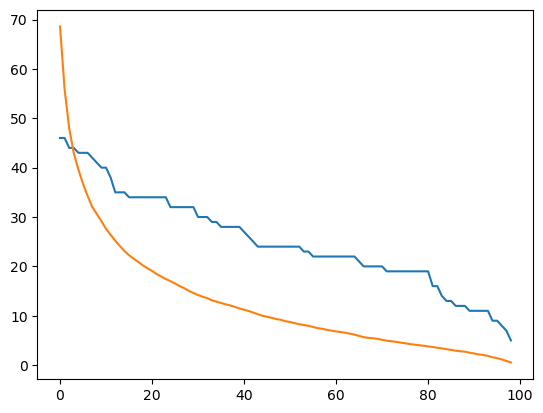

In [130]:
import matplotlib.pyplot as plt
plt.plot(inc[1:])
plt.plot(num[1:]/100)

In [ ]:
# then, load and check for the second stage

In [132]:
results = pd.read_csv('../pred_results44.csv') # this will have probabilities... then reduce the above red_df further according to the probs here

In [139]:
results.loc[results.coal>0.05].shape

(47, 5)